In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = sqlite3.connect('database.sqlite')

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


### List of Countries

In [3]:
countries = pd.read_sql("""SELECT *
                        FROM Country;""", conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


### List of Leagues

In [4]:
leagues = pd.read_sql("""SELECT *
                        FROM League;""", conn)
leagues

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


### List of leagues and their country

In [5]:
leagues_cont = pd.read_sql("""SELECT *
                        FROM League
                        JOIN Country ON Country.id = League.country_id;""", conn)
leagues_cont

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


### List of teams

In [6]:
teams = pd.read_sql("""SELECT *
                        FROM Team
                        ORDER BY team_long_name
                        LIMIT 10;""", conn)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


### List of players

In [7]:
players = pd.read_sql("""SELECT *
                        FROM Player;""", conn)
players

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [8]:
players.dtypes

id                      int64
player_api_id           int64
player_name            object
player_fifa_api_id      int64
birthday               object
height                float64
weight                  int64
dtype: object

### Calculate the age of players

In [9]:
players['birth_year'] = pd.to_datetime(players['birthday'])
players['birth_year'] =players['birth_year'].dt.year
players.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,birth_year
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,1989
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,1991
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,1982
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,1979


In [10]:
# The data set is for 4 years ago 
players['age'] = players['birth_year'].apply(lambda x: 2017-x)
players.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,birth_year,age
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992,25
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,1989,28
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,1991,26
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,1982,35
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,1979,38


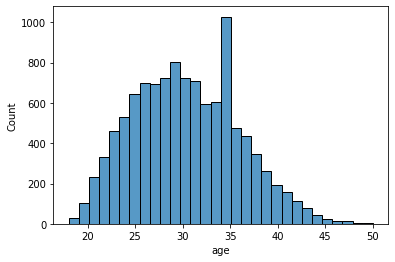

In [11]:
sns.histplot(data= players, x= 'age',bins = 30);

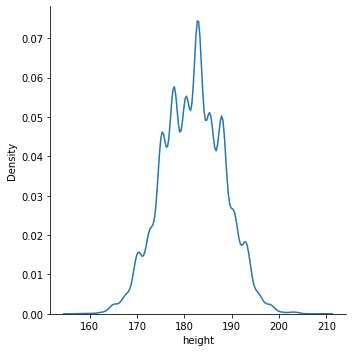

In [12]:
sns.displot(data = players,x='height',kind="kde");

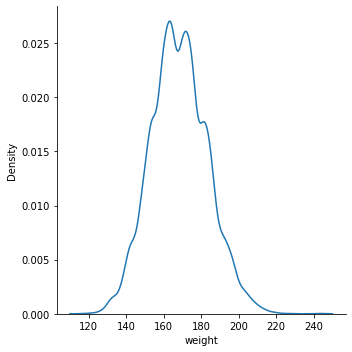

In [13]:
sns.displot(data = players,x='weight',kind="kde");

### How many players are taller than 2.00 meters?

In [14]:
result = pd.read_sql("""SELECT COUNT(Player.id)
                    FROM Player
                    WHERE Player.height >= 200""",conn)
result

,COUNT(Player.id)
0,22


### Who are the 10 heaviest players?

In [15]:
df_heaviest = pd.read_sql('''SELECT *
            FROM Player
            ORDER BY Player.weight DESC
            LIMIT 10''',conn)
df_heaviest

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,5908,148325,Kristof van Hout,185306,1987-02-09 00:00:00,208.28,243
1,10313,27313,Tim Wiese,53012,1981-12-17 00:00:00,193.04,243
2,4884,5044,Jeroen Verhoeven,137692,1980-04-30 00:00:00,198.12,227
3,4412,27267,Ishmael Miller,169725,1987-03-05 00:00:00,193.04,225
4,1598,101584,Cassio,167958,1987-06-06 00:00:00,195.58,220
5,1822,19020,Christopher Samba,46590,1984-03-28 00:00:00,193.04,220
6,5976,210822,Lars Unnerstall,199833,1990-07-20 00:00:00,198.12,220
7,6772,30669,Marcus Hahnemann,53785,1972-06-15 00:00:00,190.50,220
8,45,40005,Abdoulaye Faye,100329,1978-02-26 00:00:00,187.96,218
9,3030,33060,Enoch Showunmi,157589,1982-04-21 00:00:00,195.58,218


In [16]:
player_att = pd.read_sql('''SELECT *  FROM Player_Attributes ''',conn)
player_att.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [17]:
player_rate = pd.read_sql('''SELECT Player.player_name,MAX(date) as last_report ,Player.height,
Player.weight,overall_rating,preferred_foot 
FROM Player_Attributes 
INNER JOIN Player ON Player_Attributes.player_fifa_api_id = Player.player_fifa_api_id 
GROUP BY Player.player_name''',conn)
player_rate.head()

,player_name,last_report,height,weight,overall_rating,preferred_foot
0,Aaron Appindangoye,2016-02-18 00:00:00,182.88,187,67,right
1,Aaron Cresswell,2016-04-21 00:00:00,170.18,146,74,left
2,Aaron Doran,2016-01-07 00:00:00,170.18,163,65,right
3,Aaron Galindo,2016-04-21 00:00:00,182.88,198,69,right
4,Aaron Hughes,2015-12-24 00:00:00,182.88,154,70,right


### Select players that their overall rating is over 86

In [18]:
top_player = player_rate[player_rate['overall_rating'] > 86]
top_player

,player_name,last_report,height,weight,overall_rating,preferred_foot
723,Andres Iniesta,2015-10-16 00:00:00,170.18,150,88,right
929,Arjen Robben,2016-01-28 00:00:00,180.34,176,89,left
1958,Cristiano Ronaldo,2015-10-16 00:00:00,185.42,176,93,right
2295,David De Gea,2016-04-21 00:00:00,193.04,181,87,right
2782,Eden Hazard,2016-01-28 00:00:00,172.72,163,88,right
3582,Gareth Bale,2016-04-28 00:00:00,182.88,163,87,left
4510,James Rodriguez,2016-02-18 00:00:00,180.34,165,87,left
4796,Jerome Boateng,2016-01-14 00:00:00,193.04,198,87,right
6053,Lionel Messi,2015-12-17 00:00:00,170.18,159,94,left
6245,Luis Suarez,2015-10-16 00:00:00,182.88,187,90,right


In [19]:
import plotly.express as px

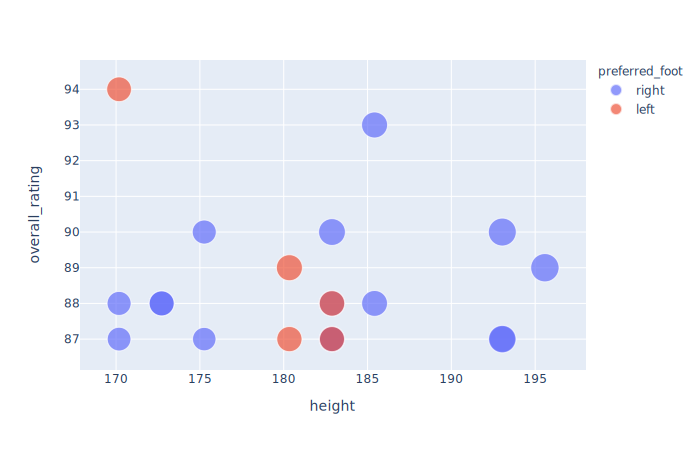

In [30]:
fig = px.scatter(top_player, x="height", y="overall_rating",size='weight', hover_data=['player_name'],
                 color='preferred_foot')
fig.show("svg")

### List of matches

In [21]:
matches = pd.read_sql('''SELECT * FROM Match;''',conn)
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


### How many matches were

    1.won by the home team
    2.won by the away team
    3.finished with a draw


In [22]:
df_won = pd.read_sql("""SELECT 
    COUNT(matches.id) AS outcome_count,
    CASE 
        WHEN matches.home_team_goal > matches.away_team_goal
            THEN 'home_win'
        WHEN matches.home_team_goal = matches.away_team_goal
            THEN 'draw'
        ELSE 'away_win'
    END AS outcome
    FROM "Match" AS matches
    GROUP BY outcome
    ORDER BY outcome_count DESC""",conn)
df_won

,outcome_count,outcome
0,11917,home_win
1,7466,away_win
2,6596,draw


### How many matches where played in each league

In [23]:
df_play = pd.read_sql("""SELECT
                        League.id,
                        League.name AS league_name,
                        COUNT(matches.id) AS match_count,
                        Country.name AS country_name
                        FROM "Match" AS matches
                        JOIN League ON matches.league_id = League.id
                        JOIN Country ON League.country_id = Country.id
                        GROUP BY League.id
                        ORDER BY
                        match_count DESC,country_name ASC""",conn)
df_play

,id,league_name,match_count,country_name
0,1729,England Premier League,3040,England
1,4769,France Ligue 1,3040,France
2,21518,Spain LIGA BBVA,3040,Spain
3,10257,Italy Serie A,3017,Italy
4,7809,Germany 1. Bundesliga,2448,Germany
5,13274,Netherlands Eredivisie,2448,Netherlands
6,17642,Portugal Liga ZON Sagres,2052,Portugal
7,15722,Poland Ekstraklasa,1920,Poland
8,19694,Scotland Premier League,1824,Scotland
9,1,Belgium Jupiler League,1728,Belgium


### How many matches were played on a per-country basis

In [24]:
match_count = pd.read_sql('''SELECT
    League.id,
    League.name AS league_name,
    COUNT(matches.id) AS match_count,
    Country.name AS country_name
    FROM "Match" AS matches
    JOIN League ON matches.league_id = League.id
    JOIN Country ON League.country_id = Country.id
    GROUP BY League.id
    ORDER BY
    match_count DESC,
    country_name ASC''',conn)
match_count

,id,league_name,match_count,country_name
0,1729,England Premier League,3040,England
1,4769,France Ligue 1,3040,France
2,21518,Spain LIGA BBVA,3040,Spain
3,10257,Italy Serie A,3017,Italy
4,7809,Germany 1. Bundesliga,2448,Germany
5,13274,Netherlands Eredivisie,2448,Netherlands
6,17642,Portugal Liga ZON Sagres,2052,Portugal
7,15722,Poland Ekstraklasa,1920,Poland
8,19694,Scotland Premier League,1824,Scotland
9,1,Belgium Jupiler League,1728,Belgium


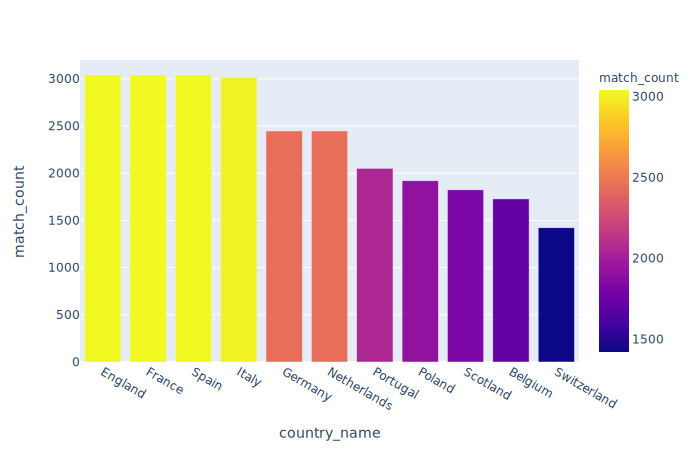

In [31]:
fig = px.bar(match_count,x='country_name',y ='match_count',color = 'match_count',height=400)
fig.show('svg')